In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot
import cv2

In [7]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

In [8]:
frames = ed.input_file('../musicalrobot/data/8_15_19_PPA.tiff')

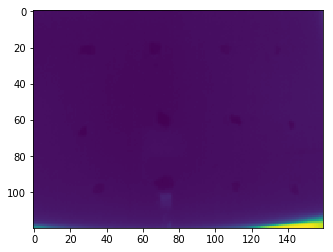

In [9]:
plt.imshow(frames[0])

Text(0.5, 1.0, 'PPA Samples')

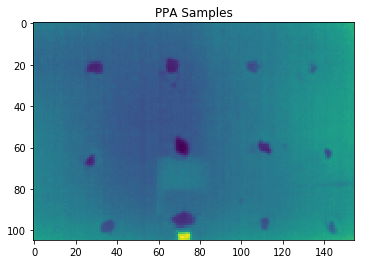

In [10]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[0:105,0:155])
plt.imshow(crop_frame[0])
plt.title('PPA Samples')

In [11]:
len(crop_frame)

1375

In [12]:
flip_frames, regprops, s_temp, p_temp, inf_temp = ed.inflection_temp(crop_frame,12,3,4)

In [13]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
0,5.0,10.0,29904.0,20.0,26.0,16.242641,29688.0
1,41.0,11.0,29858.0,21.0,19.0,13.071068,29613.0
2,82.0,19.0,29843.0,29.0,19.0,13.414214,29660.0
3,7.0,42.0,29826.0,52.0,25.0,16.828427,29615.0
4,44.0,42.0,29764.0,52.0,34.0,20.727922,29454.0
5,82.0,48.0,29745.0,58.0,30.0,18.242641,29603.0
6,10.0,78.0,29652.0,88.0,15.0,14.207107,29511.0
7,44.0,82.0,29626.0,92.0,58.0,26.727922,29340.0
8,83.0,87.0,29643.0,97.0,44.0,22.485281,29419.0
9,5.0,118.0,29831.0,128.0,37.0,19.899495,29603.0


In [47]:
reorder_index = regprops[0].index

In [48]:
df = regprops[0].set_index('Plate_coord')

In [49]:
reorder_index = df.index

In [50]:
reorder_index

Float64Index([20.0, 21.0, 29.0, 52.0, 52.0, 58.0, 88.0, 92.0, 97.0, 128.0,
              136.0, 134.0],
             dtype='float64', name='Plate_coord')

In [51]:
for i in range(len(regprops)):
    regprops[i].set_index('Plate_coord',inplace=True)
    regprops[i].reindex(reorder_index)

ValueError: cannot reindex from a duplicate axis

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

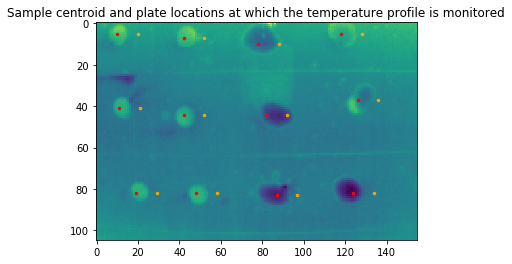

In [9]:
plt.imshow(flip_frames[1374])
plt.scatter(regprops[1374]['Plate_coord'],regprops[1374]['Row'],c='orange',s=6)
plt.scatter(regprops[1374]['Column'],regprops[1374]['Row'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

In [20]:
np.mean(inf_temp)

43.685

In [15]:
x = np.linspace(1,len(s_temp[0]),len(s_temp[0]))

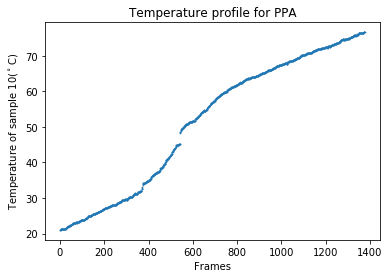

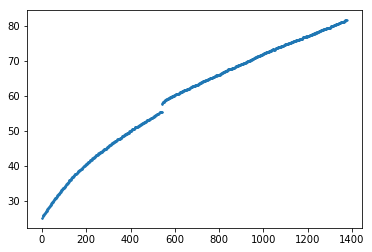

In [19]:
plt.scatter(x,s_temp[8],s=0.5)
plt.xlabel('Frames')
plt.ylabel('Temperature of sample 10($^\circ$C)')
plt.title('Temperature profile for PPA')
plt.show()
plt.scatter(x,p_temp[9],s=1.5)